In [17]:
import sys
from pathlib import Path

# Point this to your project root (one level ABOVE src)
PROJ_ROOT = Path(r"C:\Users\quantbase\Desktop\SyStrat_factmod")

if str(PROJ_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJ_ROOT))

print("Project root on sys.path:", PROJ_ROOT in map(Path, map(str, sys.path)))

from src.fm_config import DATA_INT
print("DATA_INT =", DATA_INT)


Project root on sys.path: True
DATA_INT = C:\Users\quantbase\Desktop\SyStrat_factmod\data_int


In [18]:
from __future__ import annotations

import pandas as pd          # already in env — no new install
import numpy as np           # already in env — no new install
import matplotlib.pyplot as plt  # already in env — no new install

from pathlib import Path      # no installation needed

# Local imports
from src.fm_config import DATA_INT                        # no installation needed
from src.fm_decompose_us import (                         # no installation needed
    _load_factor_panel_us,
    _load_factor_model_us,
    build_equal_weight_portfolio,
    load_weights_from_csv_wide,
    decompose_portfolio_us,
    sanity_check_decomposition_us,
    compute_portfolio_returns_from_panel,
)

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 140)

DATA_INT


WindowsPath('C:/Users/quantbase/Desktop/SyStrat_factmod/data_int')

In [20]:
factor_panel_us = _load_factor_panel_us()
fac_ret_us, eps_us = _load_factor_model_us()

factor_panel_us.head(), fac_ret_us.head(), eps_us.head()

(        date ticker market       ret       mkt_cap      SIZE       VAL  MOM      QUAL     ROE_z      GM_z  CashEY_z   LEV_raw     LEV_z  \
 0 2020-01-02   AAPL     US  0.022885  1.317066e+12  0.707107  0.707107  NaN  0.707107  0.707107 -0.707107  0.707107  0.737151  0.707107   
 1 2020-01-02   MSFT     US  0.018516  1.222479e+12 -0.707107 -0.707107  NaN -0.707107 -0.707107  0.707107 -0.707107  0.610639 -0.707107   
 2 2020-01-03   AAPL     US -0.009722  1.304262e+12  0.707107  0.707107  NaN  0.707107  0.707107 -0.707107  0.707107  0.737151  0.707107   
 3 2020-01-03   MSFT     US -0.012452  1.207257e+12 -0.707107 -0.707107  NaN -0.707107 -0.707107  0.707107 -0.707107  0.610639 -0.707107   
 4 2020-01-06   AAPL     US  0.007934  1.314611e+12  0.707107  0.707107  NaN  0.707107  0.707107 -0.707107  0.707107  0.737151  0.707107   
 
    EMA20_GAP  VOL_Z       LIQ  
 0        NaN    NaN  0.707107  
 1        NaN    NaN -0.707107  
 2   0.707107    NaN  0.707107  
 3  -0.707107    NaN -0.70

In [21]:
demo_tickers = list(eps_us.columns)   # currently ['AAPL', 'MSFT']
demo_dates = fac_ret_us.index

weights_eq = build_equal_weight_portfolio(demo_tickers, demo_dates)
weights_eq.head()

,AAPL,MSFT
date,,
2020-01-30,0.5,0.5
2020-01-31,0.5,0.5
2020-02-03,0.5,0.5
2020-02-04,0.5,0.5
2020-02-05,0.5,0.5


In [22]:
factor_contrib, resid_contrib, total_model = decompose_portfolio_us(
    weights=weights_eq,
    factor_panel=factor_panel_us,
    factor_returns=fac_ret_us,
    residuals=eps_us,
)

factor_contrib.head(), resid_contrib.head(), total_model.head()


(              market  sector_all     EMA20_GAP           LIQ  MOM  QUAL          SIZE  VAL         VOL_Z
 date                                                                                                    
 2020-01-30  0.013202         0.0  0.000000e+00 -0.000000e+00 -0.0  -0.0  7.787147e-17 -0.0 -1.427644e-18
 2020-01-31 -0.029681         0.0  0.000000e+00 -0.000000e+00 -0.0  -0.0 -1.373679e-16 -0.0 -0.000000e+00
 2020-02-03  0.010783         0.0  0.000000e+00 -0.000000e+00 -0.0  -0.0  3.017394e-16 -0.0 -0.000000e+00
 2020-02-04  0.032915         0.0 -0.000000e+00 -5.656739e-20  0.0   0.0  0.000000e+00  0.0 -8.318734e-21
 2020-02-05  0.003492         0.0 -4.232750e-20  0.000000e+00  0.0   0.0 -6.971339e-17  0.0  0.000000e+00,
 date
 2020-01-30    2.229667e-04
 2020-01-31    1.329358e-04
 2020-02-03    4.914833e-05
 2020-02-04    4.124589e-09
 2020-02-05   -2.576700e-05
 Name: idiosyncratic, dtype: float64,
 date
 2020-01-30    0.013425
 2020-01-31   -0.029548
 2020-02-03    0.01

In [23]:
true_ret, model_ret, diff, rmse, max_abs_diff = sanity_check_decomposition_us(
    weights=weights_eq,
    factor_panel=factor_panel_us,
    total_from_model=total_model,
)

rmse, max_abs_diff, pd.concat(
    [true_ret, model_ret, diff.rename("diff")], axis=1
).head()


(1.0159960937373356e-18,
 3.469446951953614e-18,
             portfolio_return_true  total_from_model          diff
 date                                                             
 2020-01-30               0.013425          0.013425  0.000000e+00
 2020-01-31              -0.029548         -0.029548  3.469447e-18
 2020-02-03               0.010832          0.010832  0.000000e+00
 2020-02-04               0.032915          0.032915  0.000000e+00
 2020-02-05               0.003467          0.003467  0.000000e+00)

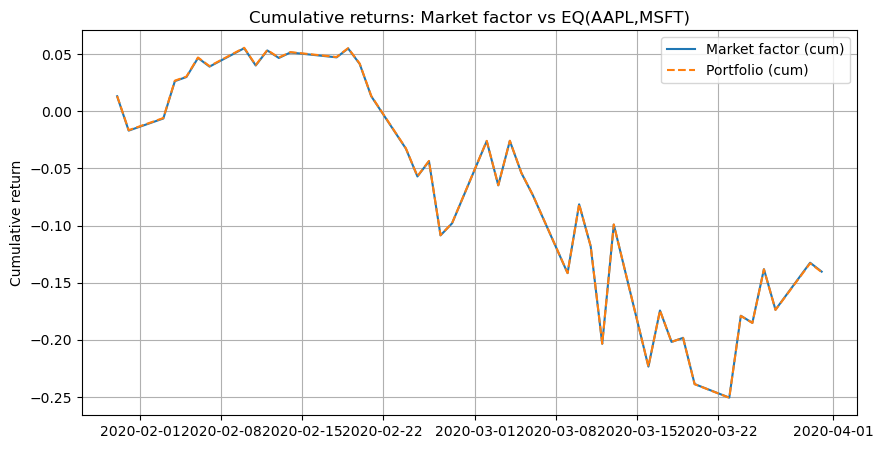

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))

cum_mkt = (1 + fac_ret_us["market"]).cumprod() - 1
cum_port = (1 + true_ret).cumprod() - 1

ax.plot(cum_mkt.index, cum_mkt, label="Market factor (cum)")
ax.plot(cum_port.index, cum_port, label="Portfolio (cum)", linestyle="--")

ax.set_title("Cumulative returns: Market factor vs EQ(AAPL,MSFT)")
ax.set_ylabel("Cumulative return")
ax.grid(True)
ax.legend()
plt.show()


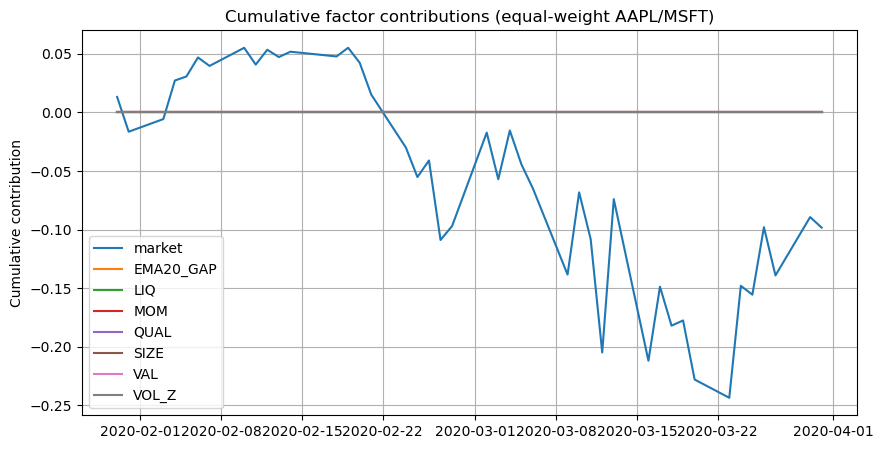

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))

for col in factor_contrib.columns:
    if col == "sector_all":  # this is always 0 in our demo
        continue
    ax.plot(factor_contrib.index, factor_contrib[col].cumsum(), label=col)

ax.set_title("Cumulative factor contributions (equal-weight AAPL/MSFT)")
ax.set_ylabel("Cumulative contribution")
ax.grid(True)
ax.legend()
plt.show()


In [26]:
#-----------Manual Weights

In [ ]:
weights_custom = load_weights_from_csv_wide("data_raw/weights_us_custom.csv")

factor_contrib_c, resid_contrib_c, total_model_c = decompose_portfolio_us(
    weights=weights_custom,
    factor_panel=factor_panel_us,
    factor_returns=fac_ret_us,
    residuals=eps_us,
)

true_ret_c, model_ret_c, diff_c, rmse_c, max_abs_diff_c = sanity_check_decomposition_us(
    weights=weights_custom,
    factor_panel=factor_panel_us,
    total_from_model=total_model_c,
)

rmse_c, max_abs_diff_c, pd.concat(
    [true_ret_c, model_ret_c, diff_c.rename("diff")], axis=1
).head()
